# **Lennard-Jones gas**

In this code we simulate a set of N particles subjected to Lennard-Jones interactions and confined in a 2D rectangular box. We do this by using the 12-6 Lennard-Jones potential. Then, we solve numerically the Newton's law of motion using Runge-kutta 4. Besides, we use a rustic method of adaptive step by reducing the time step when two particles are *close enough*. The condition for *close enough* is that any of the forces between the particles be greater than or equal to `F0`, which is the Lennard-Jones force between two particles at some distant `R0`. This distance must be choose by the user.

**Credits**
* Juan Andrés Guarín Rojas
* [GitHub](https://github.com/AndresGuarin)

# **Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import LJGas.solver.particles as partic
import LJGas.solver.animation as ani
import LJGas.analysis.pressure as press

from LJGas.analysis.visualization import moving_mean

from datetime import datetime

# **1. Test Simulation of 30 particles**

In [2]:
# Choose parameters 
h = 0.04; N = 6000; R0 = 1.05; h0 = 0.01; box=[100,50]

# Set intial conditions
Np = 15

np.random.seed(174489)
X0 = np.random.random(Np)*box[0]*0.9 - box[0]*0.9/2
Y0 = np.random.random(Np)*box[1]*0.9 - box[1]*0.9/2
Theta0 = np.random.random(Np)*2*np.pi - np.pi
Vx0 = 2*np.cos(Theta0) + np.random.random(Np)*0.1 - 0.05
Vy0 = 2*np.sin(Theta0) + np.random.random(Np)*0.1 - 0.05

#X0 = Xf; Y0 = Yf; Vx0 = Vxf; Vy0 = Vyf

sim = partic.LJGas(h,N,Np,R0,h0,box,verbose=False)
s = sim.simulate([X0,Y0,Vx0,Vy0])

self1 = sim.get_self()
Lh = self1.Lh
time = np.zeros(N+1)
for i in range(N):
    time[i+1] = time[i]+Lh[i]

In [3]:
#np.round(Vx0,2), np.round(Vy0,2)
np.mean(Vx0), np.mean(Vy0)

(0.17425643086926765, -0.1086804103647539)

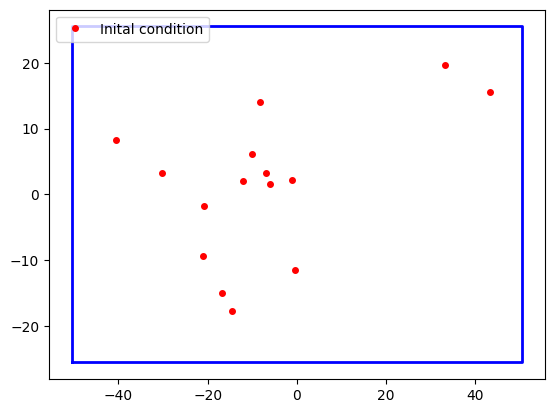

In [4]:
%matplotlib inline

Xf = s[0][-1,:]; Yf = s[1][-1,:]; Vxf = s[2][-1,:]; Vyf = s[3][-1,:]

b0 = box[0]/2 + R0/2; b1 = box[1]/2 + R0/2
plt.plot([-b0,b0,b0,-b0,-b0],[-b1,-b1,b1,b1,-b1],'-b',lw=2)
plt.plot(X0,Y0,'or',ms=4,label='Inital condition')
#plt.plot(X0,Y0,'or',ms=4,label='Final condition')
plt.legend(loc='upper left')
plt.show()

# **2. Animation**

In [3]:
date = '01-25_24-48-00'
#date = datetime.now().strftime("%m-%d_%H-%M-%S")

In [4]:
%matplotlib auto
%matplotlib auto

anim = ani.animate_path(self1,s,duration=100,kind=0,save=False,name=date+'test.mp4',verbose=True,plot_params=['-b','or',1,5,0.3],amp=1,interval=50)
plt.show()

Using matplotlib backend: <object object at 0x000002B7BA5EB510>
Using matplotlib backend: TkAgg


In [21]:
def get_uniform(self,M,amp=1):
    """
    @params 
        M :  np.array of data of the motion as LX, LY, LVx, and LVy. 
            It can be for example s[0], s[1], time
    """
    if self.LContacts != []:
        slice_step = int(self.h/self.h0)*amp
        i0 = self.LContacts[0][0]
        Ls = [M[:i0]]
        for k in range(len(self.LContacts)-1):
            i,j = self.LContacts[k]
            i1,j1 = self.LContacts[k+1]
            Ls.append(M[i:j:slice_step])
            Ls.append(M[j:i1])
        i1,j1 = self.LContacts[-1]
        Ls.append(M[i1:j1:slice_step])
        Ls.append(M[j1:])
        s1 = np.concatenate(Ls)
    else:
        s1 = M
    return s1

# Make the steps uniform
amp=1
LX1 = get_uniform(self1,s[0],amp)
LY1 = get_uniform(self1,s[1],amp)
time1 = get_uniform(self1,time,amp)

# Plot parameters
fmt1 = '-b'; fmt2 = 'or'; lw1 = 0.5; ms1 = 5; alpha1 = 0.5
b0 = self1.box[0]/2+self1.R0/2; b1 = self1.box[1]/2+self1.R0/2
c0 = self1.box[0]/2; c1 = self1.box[1]/2
l0 = self1.lim[0]+1.1*self1.R0/2

#local function for update each frame
def update(j):    
    ax.clear() # Clear the before plot
    for i in range(self1.Np): ax.plot(LX1[:j,i],LY1[:j,i],fmt1,lw=lw1,alpha=alpha1); ax.plot(LX1[j,i], LY1[j,i], fmt2,ms=ms1) #positions
    ax.plot(0,0,'o',ms=0, label=r'$n=$'+f'{j}\n'+r'$\overline{t}=$ '+f'{np.round(time1[j],1)}') #legends
    ax.plot([-b0,b0,b0,-b0,-b0],[-b1,-b1,b1,b1,-b1],'-b',lw=2) #box
    ax.plot([-c0,c0,c0,-c0,-c0],[-c1,-c1,c1,c1,-c1],'--',lw=0.5,color='gray') #box
    plt.legend(loc='upper right')

# Create figure and axis
length = 8
heigth = b1/b0*length
fig = plt.figure(figsize=(length*1.1,heigth))
ax = fig.gca()

# Set the steps of the animation
duration=221
local_time = 0.25   # Empirical time in seconds that matplotlib.pyplot lasts for each plot of the animation
Nf = LX1.shape[0]
dj = int(Nf*local_time/duration)

# Animate the movement
ani = animation.FuncAnimation(fig,update,range(1,Nf,dj), repeat=False) 
#ani.save('test_animation.mp4',writer='ffmpeg')
plt.show()

In [33]:
NN  = 500
tt = np.linspace(0,2*np.pi,NN)
xx = 2*np.cos(tt)
yy = np.sin(tt)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

def update(j):
    ax.clear()
    ax.plot(xx[:j],yy[:j],'-b',lw=2)
    ax.plot(xx[j],yy[j],'or',ms=5)
    plt.xlim(-2.2,2.2)
    plt.ylim(-2.2,2.2)

ani = animation.FuncAnimation(fig,update,range(1,NN,5),repeat=False,interval=10)
plt.show()

# **3. Analysis**

In [38]:
%matplotlib inline

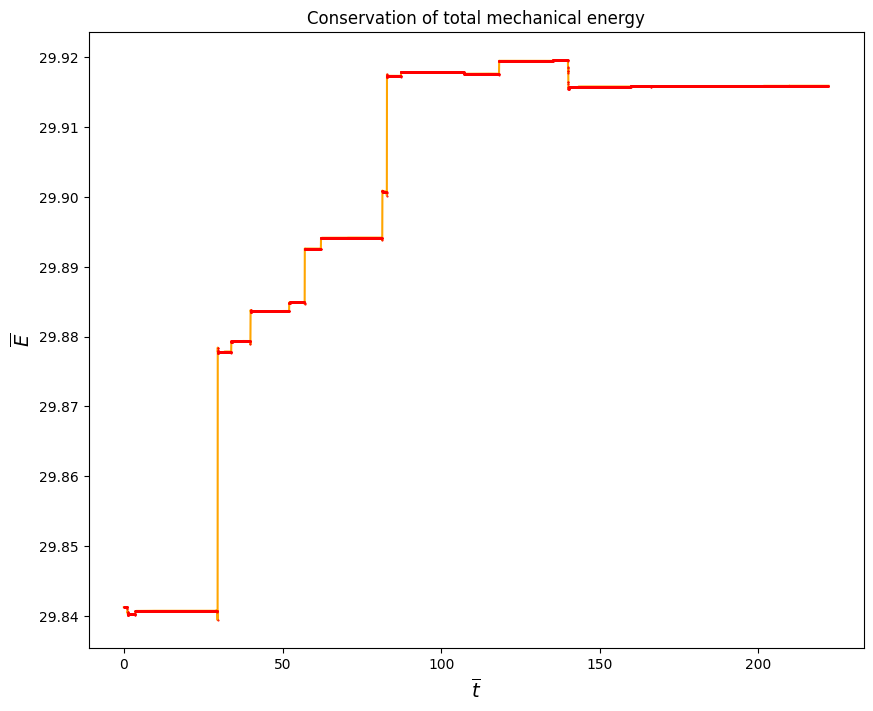

In [39]:
Em = sim.get_Energy(s)[2]

plt.figure(figsize=(10,8))
plt.title('Conservation of total mechanical energy')
plt.ylabel(r'$\overline{E}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time,Em,'-',color='orange') ;plt.plot(time,Em,'o',color='red', ms=0.5)
plt.savefig('images/NParticlesGas/'+date+' mechanical_energy.png',dpi=350)
plt.show()

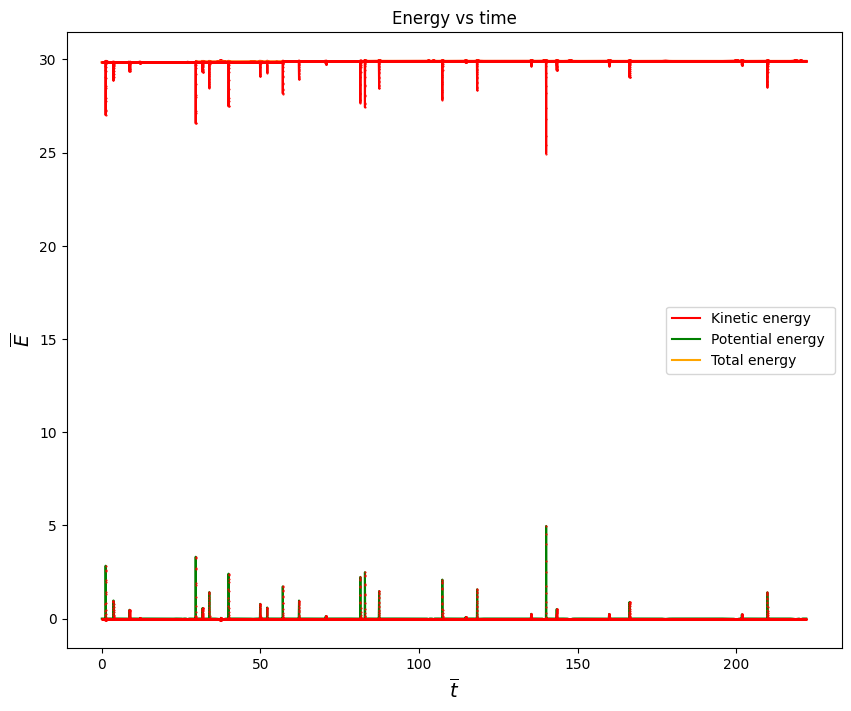

In [40]:
Ek, V, Em  = sim.get_Energy(s)

plt.figure(figsize=(10,8))
plt.title('Energy vs time')
plt.ylabel(r'$\overline{E}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time, Ek,'-',color='red',label = 'Kinetic energy') ;plt.plot(time, Ek,'o',color='red', ms=0.5)
plt.plot(time, V,'-',color='green',label = 'Potential energy ') ;plt.plot(time, V,'o',color='red', ms=0.5)
plt.plot(time, Em,'-',color='orange',label = 'Total energy') ;plt.plot(time, Em,'o',color='red', ms=0.5)
plt.legend()
plt.savefig('images/NParticlesGas/'+date+' energy.png',dpi=350)
plt.show()

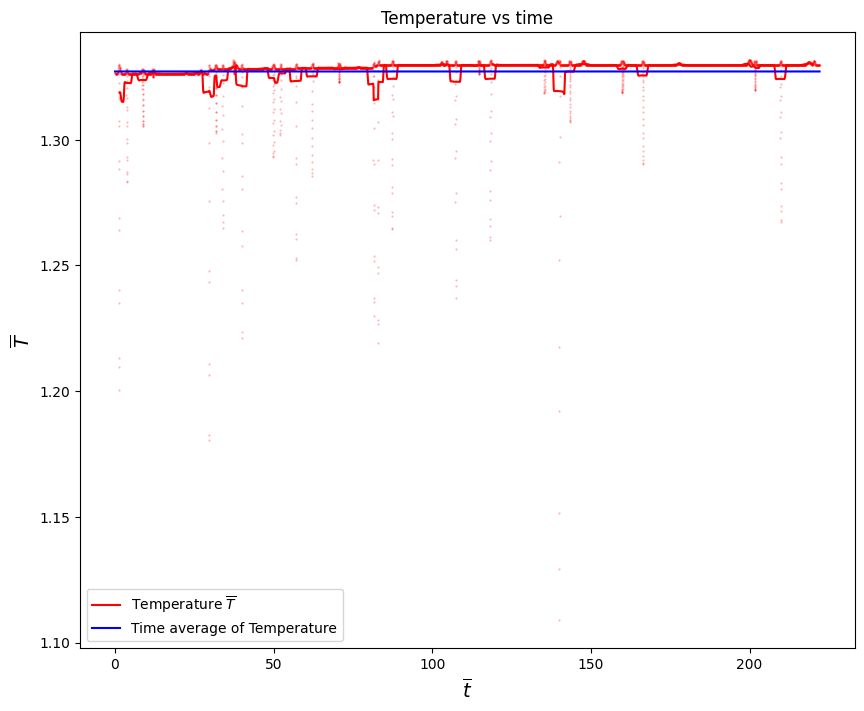

In [41]:
Ek, V, Em  = sim.get_Energy(s)
T = Ek*2/(3*self1.Np)
Tmean = np.mean(T)*np.ones(len(Ek))
#Em_mean = np.mean(Em*2/(3*self1.Np))*np.ones(len(Em))

time1, T1 = moving_mean(time,T,w=100)
plt.figure(figsize=(10,8))
plt.title('Temperature vs time')
plt.ylabel(r'$\overline{T}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time1, T1,'-',color='red',label = r'Temperature $\overline{T}$') ;plt.plot(time, T,'o',color='red',alpha=0.3, ms=0.5)
plt.plot(time, Tmean,'-',color='blue',label = r'Time average of Temperature')
#plt.plot(time, Em_mean,'-',color='cyan',label = r'Time average of $\frac{2}{3N_p}\overline{E}$')
plt.legend()
plt.savefig('images/NParticlesGas/'+date+' temperature.png',dpi=350)
plt.show()

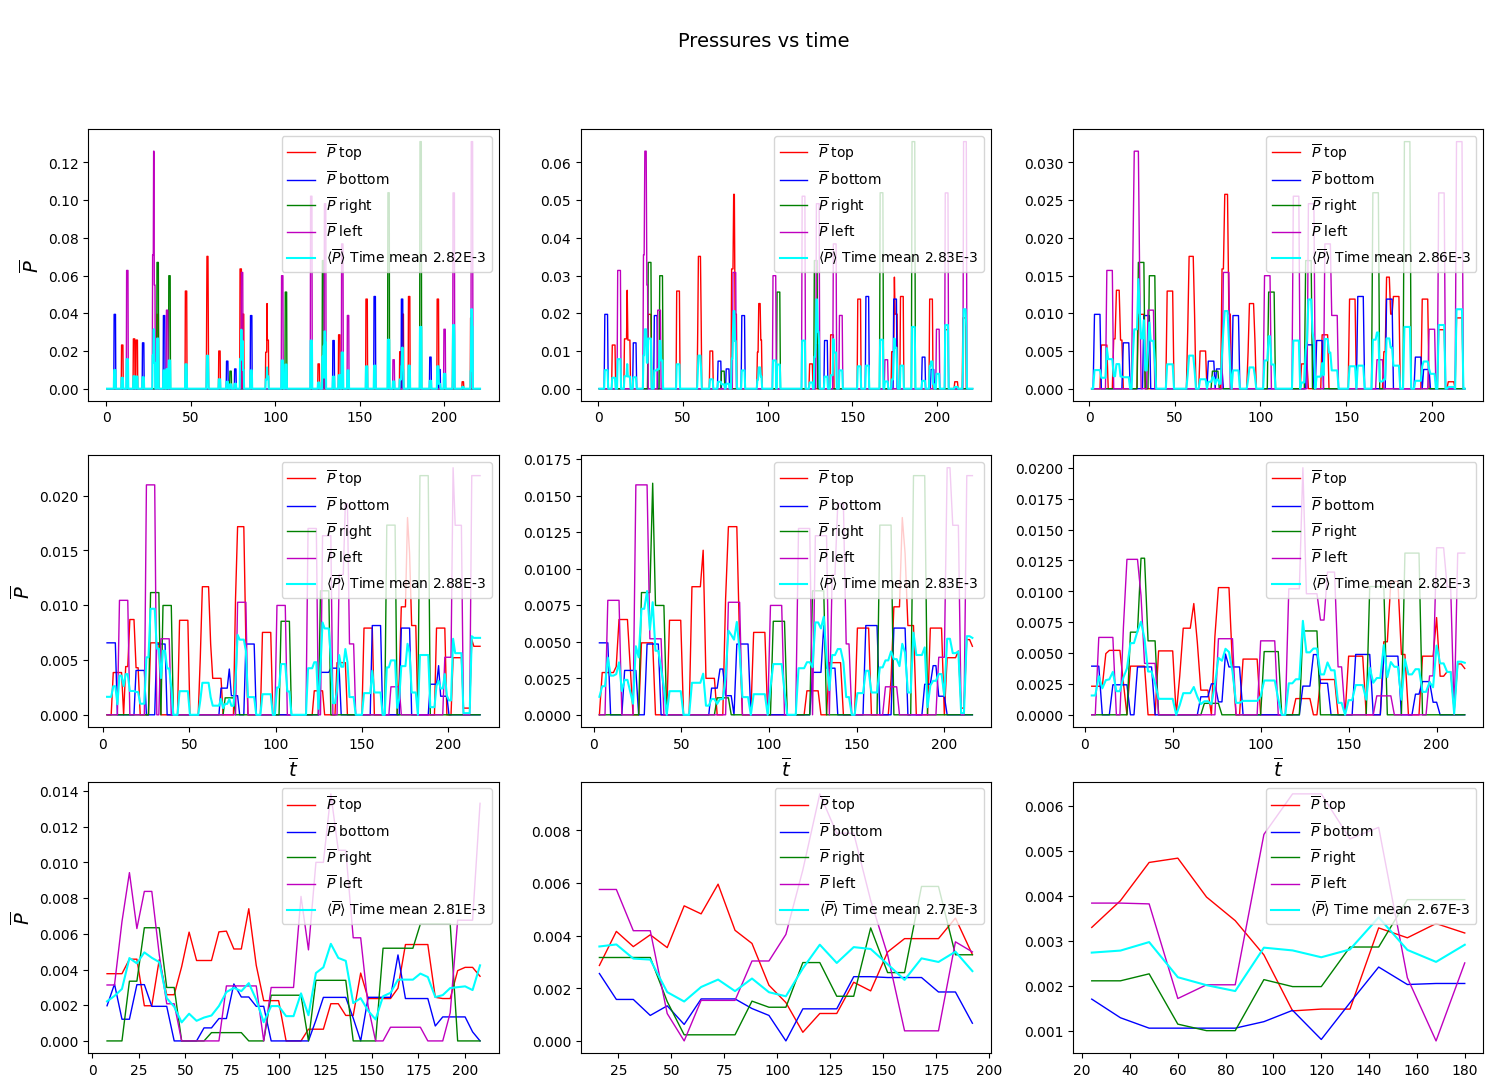

In [42]:
#Ldt = [5*h, 10*h, 20*h, 30*h, 40*h, 50*h, 60*h, 80*h, 100*h]
Ldt = [5*h, 10*h, 20*h, 30*h, 40*h, 50*h, 100*h, 200*h, 300*h]
press.plot_pressure_charts(s,time,box,Ldt,date=date,save=True)
plt.show()

In [43]:
Kmean = 3/2*np.mean(T)
P_predicted = 2/3*Np*Kmean/(box[0]*box[1])

print(f'P predicted: {np.round(np.mean(P_predicted)*10**3,3)}E-3')

P predicted: 3.982E-3


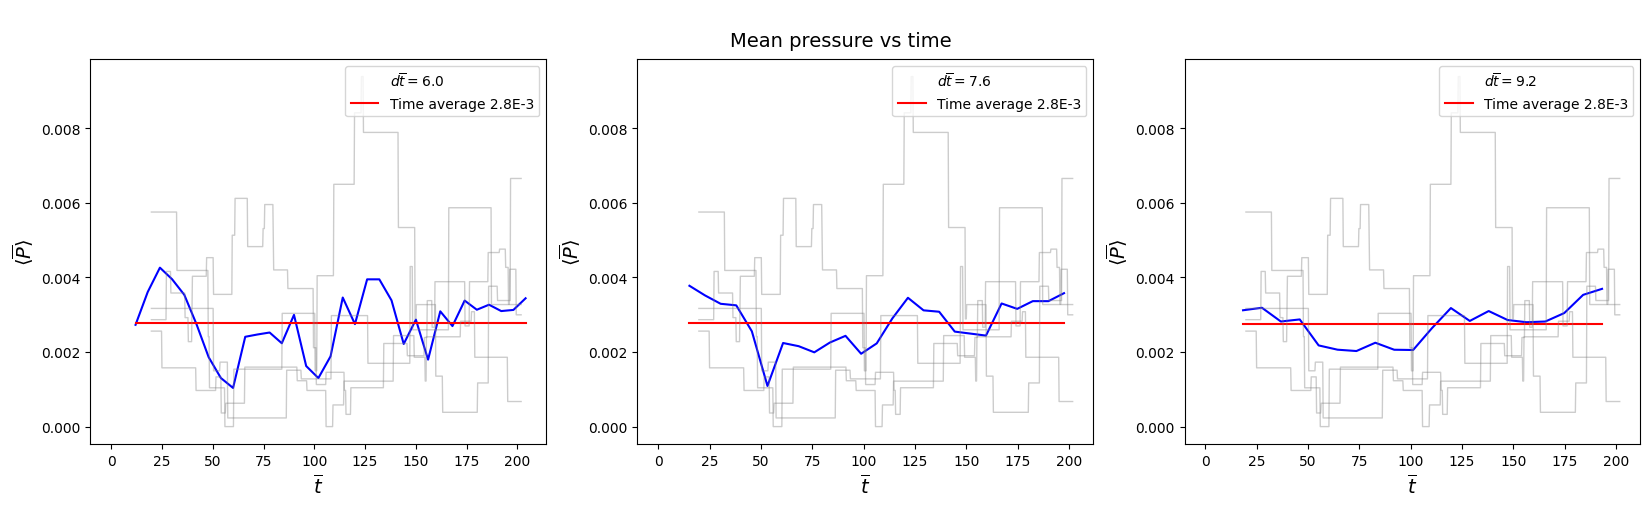

In [44]:
Ldt = [150*h, 190*h, 230*h]
press.plot_pressure_line(s,time,box,Ldt,h,w2=200,date=date,save=True)
plt.show()

In [45]:
print(f'Delta t: {2*box[0]/np.max(np.abs(Vx0))}')
print(f'Delta t: {2*box[0]/np.max(np.abs(Vx0))}')

Delta t: 98.4455144396852
Delta t: 98.4455144396852
